лабораторна робота 6
виконав Філонов Дмитро ФБ-22

In [20]:
import numpy as np
import matplotlib.pyplot as plt


1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів.

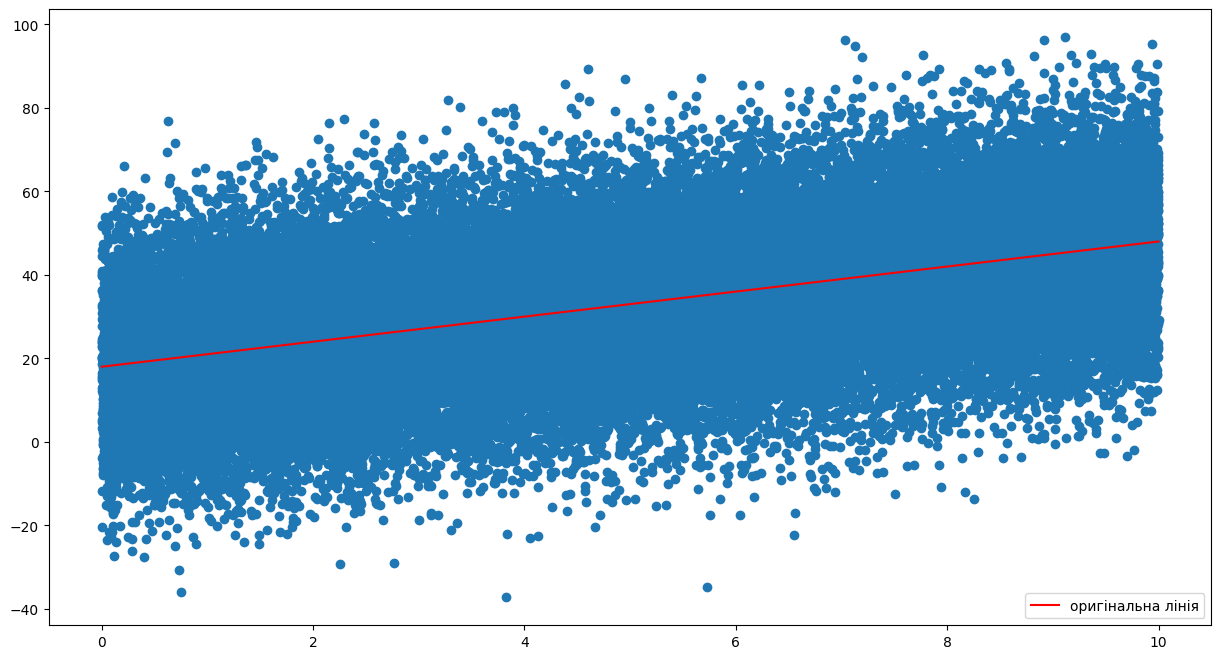

In [21]:
k = 3
b = 18
np.random.seed(0)
x = np.linspace(0, 10, 50000)
y =k*x+b + np.random.normal(0, 15, 50000)
plt.figure(figsize=(15, 8))
plt.scatter(y = y, x=x)
plt.plot(x, x*k+b, color="red", label="оригінальна лінія")
plt.legend(loc ='lower right')


2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.

In [22]:
def task1(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    k = np.mean((x-x_mean)*(y-y_mean))/np.mean((x-x_mean)**2)
    b = y_mean - k*x_mean
    return k, b
k1, b1 = task1(x, y)
print ("k =",k1, "\nb =",b1)


k = 3.008792629852237 
b = 17.899126712056166


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [23]:
p = np.polyfit(x, y, 1)
print("k =", p[0])
print("b =",p[1])


k = 3.008792629852239
b = 17.89912671205617


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

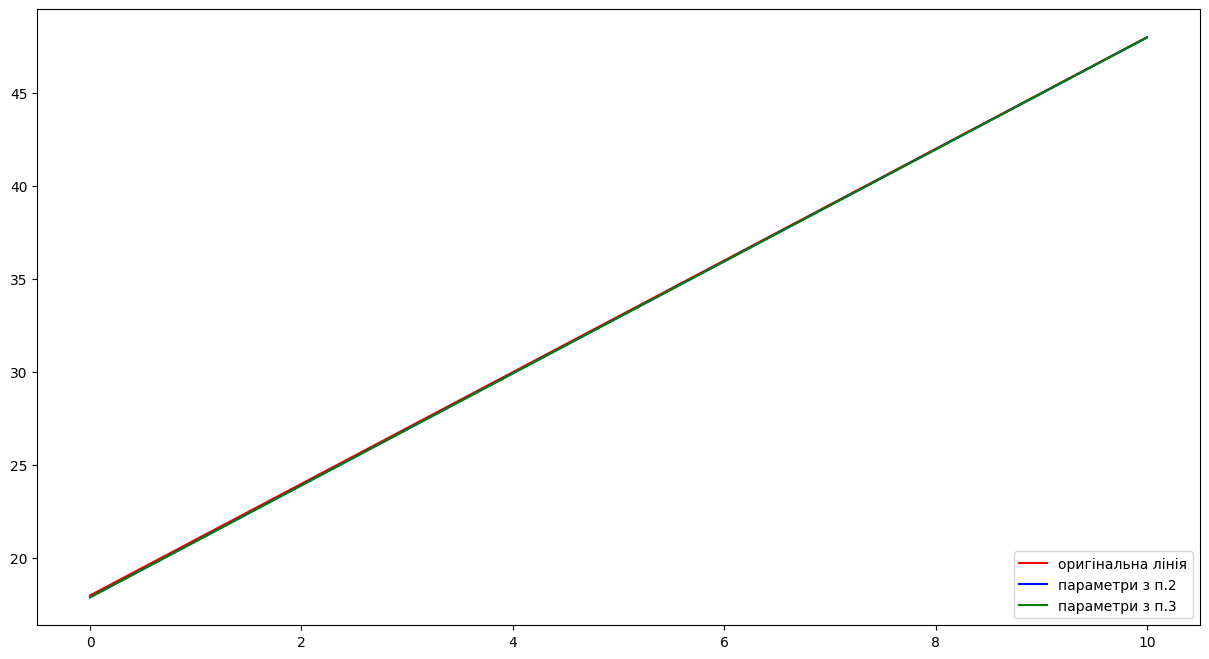

In [24]:
plt.figure(figsize=(15, 8))
plt.plot(x, x*k+b, color="red", label="оригінальна лінія")
plt.plot(x, x*k1+b1, color="blue", label="параметри з п.2")
plt.plot(x, x*p[0]+p[1], color="green", label="параметри з п.3")
plt.legend(loc ='lower right')

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [25]:
def task2(x, y, learning_rate, num_iterations):
    k = 0
    b = 0 
    n = len(x)
    error=[]
    for _ in range(num_iterations):
        predicted = k*x + b

        error.append(np.mean((y-predicted)**2))

        gradient_k = (-2/n) * sum(x*(y-predicted))
        gradient_b = (-2/n) * sum(y-predicted)

        k =k - learning_rate*gradient_k
        b =b - learning_rate*gradient_b
    return k,b,error

learning_rate = 0.01
num_iterations = 1000
k2, b2, error = task2(x, y, learning_rate, num_iterations)
print('k =',k2,'\nb =', b2)


k = 3.0279581246598024 
b = 17.772292533146032


2. Додайте отриману лінію регресії на загальний графік

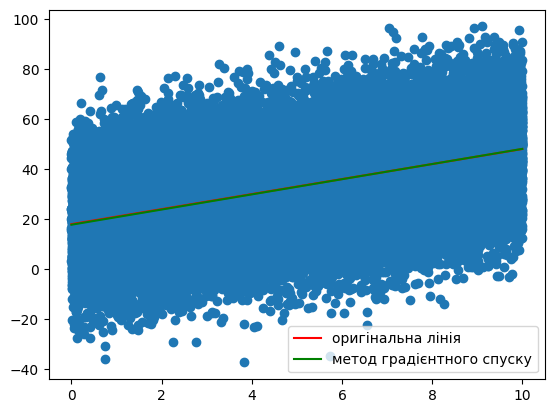

In [26]:
plt.scatter(x, y)
plt.plot(x, x*k+b, color='red', label="оригінальна лінія")
plt.plot(x, x*k2+b2, color='green', label="метод градієнтного спуску")
plt.legend(loc ='lower right')

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки


1000


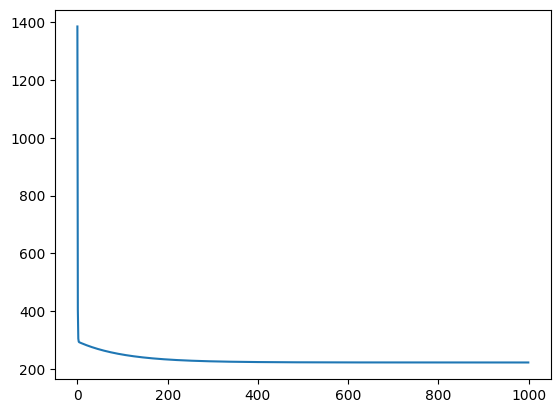

In [27]:
plt.plot(error)
print(len(error))

4. Порівняйте отримані результати з результатами попереднього завдання

In [28]:
print("похибка з методу найменших квадратів")
print("похибка відносно k:", f'{abs(k-k1)/k*100}%')
print("похибка відносно b:", f'{abs(b-b1)/b*100}%')
print('\nпохибка з методу градієтного спуску')
print("похибка відносно k:", f'{abs(k-k2)/k*100}%')
print("похибка відносно b:", f'{abs(b-b2)/b*100}%')

похибка з методу найменших квадратів
похибка відносно k: 0.2930876617412389%
похибка відносно b: 0.5604071552435228%

похибка з методу градієтного спуску
похибка відносно k: 0.9319374886600803%
похибка відносно b: 1.2650414825220422%
